# Fake -News Detection Project 

Problem statement:


The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 
In this project, you are given a dataset in the fake-news_data.zip folder. The folder contains a CSV files train_news.csv and you have to use the train_news.csv data to build a model to predict whether a news is fake or not fake. You have to try out different models on the dataset, evaluate their performance, and finally report the best model you got on the data and its performance.

Data- Description:


There are 6 columns in the dataset provided to you. The description of each of the column is given below:
* “id”:  Unique id of each news article
* “headline”:  It is the title of the news.
* “news”:  It contains the full text of the news article
* “Unnamed:0”:  It is a serial number
* “written_by”:  It represents the author of the news article
* “label”:  It tells whether the news is fake (1) or not fake (0).

Submission:


You have to submit the jupyter notebook, in which you have built your best performing model. Your jupyter notebook should be well commented so that it can be easily understood what are you actually trying to do in the code. Also mention which is your best performing model and the measure of its performance (accuracy score , f1 score etc)


In [1]:
# Let's import the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag
from collections import Counter

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
df=pd.read_csv('train_news.csv')
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [3]:
# Let's drop Unnamed: 0 from dataset.
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [4]:
# Let's see how many Null Values are present
print("Feature:\n", df.isnull().sum())

Feature:
 headline       558
written_by    1957
news            39
label            0
dtype: int64


In [5]:
# Treating missing values
# 1. Headline: Replacing with 'No Headline'
df['headline'].fillna('No Headline',inplace=True)

# 2. written_by
df['written_by'].fillna('No Author',inplace=True)

# news: i will drop these rows
df.dropna(subset=['news'],inplace=True)

<AxesSubplot:>

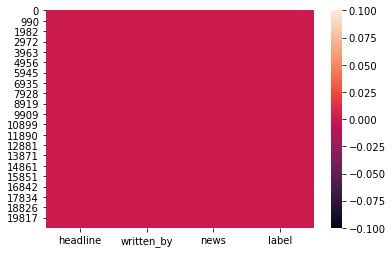

In [6]:
# Hetmap for null values
sns.heatmap(df.isnull())

In [7]:
df.shape

(20761, 4)

In [8]:
df.head(10)

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,Whatever the Outcome on November 8th the US Wi...,No Author,Taming the corporate media beast Whatever the ...,1
6,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
7,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
8,No Headline,steventexas,People have made up their minds on president.\...,1
9,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1


<AxesSubplot:xlabel='label', ylabel='count'>

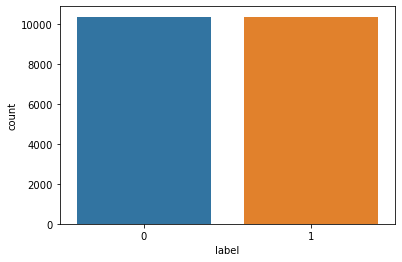

In [9]:
# Let's see how our Target column is distributed
sns.countplot('label',data=df)

In [10]:
#Ratio
print ('Fake = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')
print ('Not Fake  = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')

Fake =  50.0 %
Not Fake  =  50.0 %


In [11]:
#New columns for headline, author and news of message and subject
df['length_headline'] = df.headline.str.len()
df['length_written_by'] = df.written_by.str.len()
df['length_news'] = df.news.str.len()
df.head()

,headline,written_by,news,label,length_headline,length_written_by,length_news
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84,26,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,72,15,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,100,7,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,100,12,6516
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,28,17,9164


In [12]:
# Checking how many distinct writers are there
df['written_by'].value_counts()

No Author                                     1939
Pam Key                                        243
admin                                          193
Jerome Hudson                                  166
Charlie Spiering                               141
                                              ... 
Christine Hauser and Jonah Engel Bromwich        1
Christopher Mele and Rebecca Fairley Raney       1
Hesh Goldstein                                   1
Umberto Pasti                                    1
Gen. Ripper                                      1
Name: written_by, Length: 4201, dtype: int64

In [13]:
df['headline'] = df.headline.str.lower()
df['written_by'] = df.written_by.str.lower()
df['news'] = df.news.str.lower()

In [14]:
cols=['headline','written_by','news']
for j in cols:
    # Replace email addresses with 'email'
    df[j] = df[j].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    df[j] = df[j].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    df[j] = df[j].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[j] = df[j].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
    df[j] = df[j].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    df[j] = df[j].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    df[j] = df[j].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    df[j] = df[j].str.replace(r'^\s+|\s+?$', '')

In [15]:
df.head()

,headline,written_by,news,label,length_headline,length_written_by,length_news
0,ethics questions dogged agriculture nominee as...,eric lipton and steve eder,washington in sonny perdue s telling georgians...,0,84,26,7936
1,u s must dig deep to stop argentina s lionel m...,david waldstein,houston venezuela had a plan it was a tactical...,0,72,15,6112
2,cotton to house do not walk the plank and vote...,pam key,sunday on abc s this week while discussing the...,0,100,7,425
3,paul lepage besieged maine governor sends conf...,jess bidgood,augusta me the beleaguered republican governor...,0,100,12,6516
4,a digital numbr numbr if trump wins,finian cunningham,finian cunningham has written extensively on i...,1,28,17,9164


In [16]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

# 'headline','written_by','news'

df['headline'] = df['headline'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

df['written_by'] = df['written_by'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

df['news'] = df['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [17]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['headline'] = df['headline'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['written_by'] = df['written_by'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['news'] = df['news'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,headline,written_by,news,label,length_headline,length_written_by,length_news
0,"[ethics, questions, dogged, agriculture, nomin...","[eric, lipton, steve, eder]","[washington, sonny, perdue, telling, georgians...",0,84,26,7936
1,"[must, dig, deep, stop, argentina, lionel, mes...","[david, waldstein]","[houston, venezuela, plan, tactical, approach,...",0,72,15,6112
2,"[cotton, house, walk, plank, vote, bill, canno...","[pam, key]","[sunday, abc, week, discussing, republican, pl...",0,100,7,425
3,"[paul, lepage, besieged, maine, governor, send...","[jess, bidgood]","[augusta, beleaguered, republican, governor, m...",0,100,12,6516
4,"[digital, numbr, numbr, trump, wins]","[finian, cunningham]","[finian, cunningham, written, extensively, int...",1,28,17,9164


In [18]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [19]:
# Processing Headline with above Function
processed_headline = []

for doc in df.headline:
    processed_headline.append(preprocess(doc))
    
print(len(processed_headline))
processed_headline[:3]


20761


[['ethic',
  'question',
  'dog',
  'agricultur',
  'nomine',
  'georgia',
  'governor',
  'new',
  'york',
  'time'],
 ['must',
  'dig',
  'deep',
  'stop',
  'argentina',
  'lionel',
  'messi',
  'new',
  'york',
  'time'],
 ['cotton',
  'hous',
  'walk',
  'plank',
  'vote',
  'bill',
  'cannot',
  'pass',
  'senat',
  'breitbart']]

In [20]:
# Processing Author with above Function
processed_written_by = []

for doc in df.written_by:
    processed_written_by.append(preprocess(doc))
    
print(len(processed_written_by))
processed_written_by[:3]


20761


[['eric', 'lipton', 'steve', 'eder'], ['david', 'waldstein'], ['pam', 'key']]

In [21]:
# Processing news with above Function
processed_news = []

for doc in df.news:
    processed_news.append(preprocess(doc))
    
print(len(processed_news))
processed_news[:1]


20761


[['washington',
  'sonni',
  'perdu',
  'tell',
  'georgian',
  'grow',
  'weari',
  'corrupt',
  'scandal',
  'state',
  'take',
  'governor',
  'numbr',
  'time',
  'give',
  'version',
  'drain',
  'swamp',
  'pledg',
  'first',
  'goal',
  'governor',
  'restor',
  'public',
  'trust',
  'state',
  'govern',
  'chang',
  'cultur',
  'state',
  'govern',
  'perdu',
  'tell',
  'leadership',
  'confer',
  'kennesaw',
  'state',
  'univers',
  'april',
  'numbr',
  'form',
  'govern',
  'depend',
  'mutual',
  'bond',
  'trust',
  'peopl',
  'govern',
  'peopl',
  'becom',
  'cynic',
  'govern',
  'perdu',
  'republican',
  'await',
  'confirm',
  'serv',
  'presid',
  'trump',
  'agricultur',
  'secretari',
  'becom',
  'target',
  'frequent',
  'critic',
  'fail',
  'honor',
  'ethic',
  'pledg',
  'eight',
  'year',
  'governor',
  'critic',
  'center',
  'fact',
  'trump',
  'continu',
  'help',
  'run',
  'famili',
  'busi',
  'ventur',
  'four',
  'compani',
  'serv',
  'governo

In [22]:
df['clean_headline']=processed_headline
df['clean_news']=processed_news

# I'm not Processing Authors name, because they are names of people. They will be used directly from 'written_by' column

In [23]:
df.head()

,headline,written_by,news,label,length_headline,length_written_by,length_news,clean_headline,clean_news
0,"[ethics, questions, dogged, agriculture, nomin...","[eric, lipton, steve, eder]","[washington, sonny, perdue, telling, georgians...",0,84,26,7936,"[ethic, question, dog, agricultur, nomine, geo...","[washington, sonni, perdu, tell, georgian, gro..."
1,"[must, dig, deep, stop, argentina, lionel, mes...","[david, waldstein]","[houston, venezuela, plan, tactical, approach,...",0,72,15,6112,"[must, dig, deep, stop, argentina, lionel, mes...","[houston, venezuela, plan, tactic, approach, d..."
2,"[cotton, house, walk, plank, vote, bill, canno...","[pam, key]","[sunday, abc, week, discussing, republican, pl...",0,100,7,425,"[cotton, hous, walk, plank, vote, bill, cannot...","[sunday, abc, week, discuss, republican, plan,..."
3,"[paul, lepage, besieged, maine, governor, send...","[jess, bidgood]","[augusta, beleaguered, republican, governor, m...",0,100,12,6516,"[paul, lepag, besieg, main, governor, send, co...","[augusta, beleagu, republican, governor, main,..."
4,"[digital, numbr, numbr, trump, wins]","[finian, cunningham]","[finian, cunningham, written, extensively, int...",1,28,17,9164,"[digit, numbr, numbr, trump, win]","[finian, cunningham, write, extens, intern, af..."


In [24]:
df['headline'] = df['clean_headline'].apply(lambda x:' '.join(y for y in x))
df['written_by'] = df['written_by'].apply(lambda x:' '.join(y for y in x))
df['news'] = df['clean_news'].apply(lambda x:' '.join(y for y in x))
df['clean_length_headline']=df.headline.str.len()
df['clean_length_news']=df.news.str.len()

df.head(10)

,headline,written_by,news,label,length_headline,length_written_by,length_news,clean_headline,clean_news,clean_length_headline,clean_length_news
0,ethic question dog agricultur nomine georgia g...,eric lipton steve eder,washington sonni perdu tell georgian grow wear...,0,84,26,7936,"[ethic, question, dog, agricultur, nomine, geo...","[washington, sonni, perdu, tell, georgian, gro...",67,4594
1,must dig deep stop argentina lionel messi new ...,david waldstein,houston venezuela plan tactic approach design ...,0,72,15,6112,"[must, dig, deep, stop, argentina, lionel, mes...","[houston, venezuela, plan, tactic, approach, d...",55,3758
2,cotton hous walk plank vote bill cannot pass s...,pam key,sunday abc week discuss republican plan repeal...,0,100,7,425,"[cotton, hous, walk, plank, vote, bill, cannot...","[sunday, abc, week, discuss, republican, plan,...",60,246
3,paul lepag besieg main governor send conflict ...,jess bidgood,augusta beleagu republican governor main seem ...,0,100,12,6516,"[paul, lepag, besieg, main, governor, send, co...","[augusta, beleagu, republican, governor, main,...",73,3735
4,digit numbr numbr trump win,finian cunningham,finian cunningham write extens intern affair a...,1,28,17,9164,"[digit, numbr, numbr, trump, win]","[finian, cunningham, write, extens, intern, af...",27,5780
5,whatev outcom novemb numbrth collis cours chin...,author,tame corpor media beast whatev outcom novemb n...,1,106,9,15285,"[whatev, outcom, novemb, numbrth, collis, cour...","[tame, corpor, media, beast, whatev, outcom, n...",67,8998
6,rapid evolut save fish pollut studi say new yo...,joanna klein,state new jersey say eat fish shellfish lower ...,0,79,12,4159,"[rapid, evolut, save, fish, pollut, studi, say...","[state, new, jersey, say, eat, fish, shellfish...",53,2357
7,alabama prison offici retali prison strike lea...,brian sonenstein,advoc say prison offici kilbi correct facil al...,1,88,16,6311,"[alabama, prison, offici, retali, prison, stri...","[advoc, say, prison, offici, kilbi, correct, f...",64,3441
8,headlin,steventexas,peopl make mind presid serv elect district att...,1,11,11,782,[headlin],"[peopl, make, mind, presid, serv, elect, distr...",7,491
9,live constant state love,gillian,leav repli toni emerson fall love heart becom ...,1,40,7,6386,"[live, constant, state, love]","[leav, repli, toni, emerson, fall, love, heart...",24,3597


In [25]:
df['clean_length_headline'][df['headline']=='headlin']=0 # Changing subject lengths to 0 for empty subjects

In [26]:
df.head(10)

,headline,written_by,news,label,length_headline,length_written_by,length_news,clean_headline,clean_news,clean_length_headline,clean_length_news
0,ethic question dog agricultur nomine georgia g...,eric lipton steve eder,washington sonni perdu tell georgian grow wear...,0,84,26,7936,"[ethic, question, dog, agricultur, nomine, geo...","[washington, sonni, perdu, tell, georgian, gro...",67,4594
1,must dig deep stop argentina lionel messi new ...,david waldstein,houston venezuela plan tactic approach design ...,0,72,15,6112,"[must, dig, deep, stop, argentina, lionel, mes...","[houston, venezuela, plan, tactic, approach, d...",55,3758
2,cotton hous walk plank vote bill cannot pass s...,pam key,sunday abc week discuss republican plan repeal...,0,100,7,425,"[cotton, hous, walk, plank, vote, bill, cannot...","[sunday, abc, week, discuss, republican, plan,...",60,246
3,paul lepag besieg main governor send conflict ...,jess bidgood,augusta beleagu republican governor main seem ...,0,100,12,6516,"[paul, lepag, besieg, main, governor, send, co...","[augusta, beleagu, republican, governor, main,...",73,3735
4,digit numbr numbr trump win,finian cunningham,finian cunningham write extens intern affair a...,1,28,17,9164,"[digit, numbr, numbr, trump, win]","[finian, cunningham, write, extens, intern, af...",27,5780
5,whatev outcom novemb numbrth collis cours chin...,author,tame corpor media beast whatev outcom novemb n...,1,106,9,15285,"[whatev, outcom, novemb, numbrth, collis, cour...","[tame, corpor, media, beast, whatev, outcom, n...",67,8998
6,rapid evolut save fish pollut studi say new yo...,joanna klein,state new jersey say eat fish shellfish lower ...,0,79,12,4159,"[rapid, evolut, save, fish, pollut, studi, say...","[state, new, jersey, say, eat, fish, shellfish...",53,2357
7,alabama prison offici retali prison strike lea...,brian sonenstein,advoc say prison offici kilbi correct facil al...,1,88,16,6311,"[alabama, prison, offici, retali, prison, stri...","[advoc, say, prison, offici, kilbi, correct, f...",64,3441
8,headlin,steventexas,peopl make mind presid serv elect district att...,1,11,11,782,[headlin],"[peopl, make, mind, presid, serv, elect, distr...",0,491
9,live constant state love,gillian,leav repli toni emerson fall love heart becom ...,1,40,7,6386,"[live, constant, state, love]","[leav, repli, toni, emerson, fall, love, heart...",24,3597


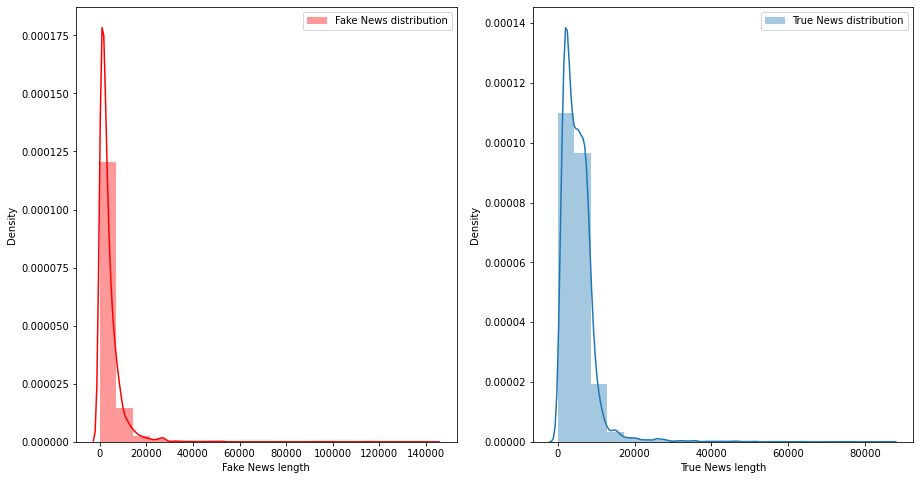

In [27]:
# news distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length_news'],bins=20,ax=ax[0],label='Fake News distribution',color='r')

ax[0].set_xlabel('Fake News length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length_news'],bins=20,ax=ax[1],label='True News distribution')
ax[1].set_xlabel('True News length')
ax[1].legend()

plt.show()

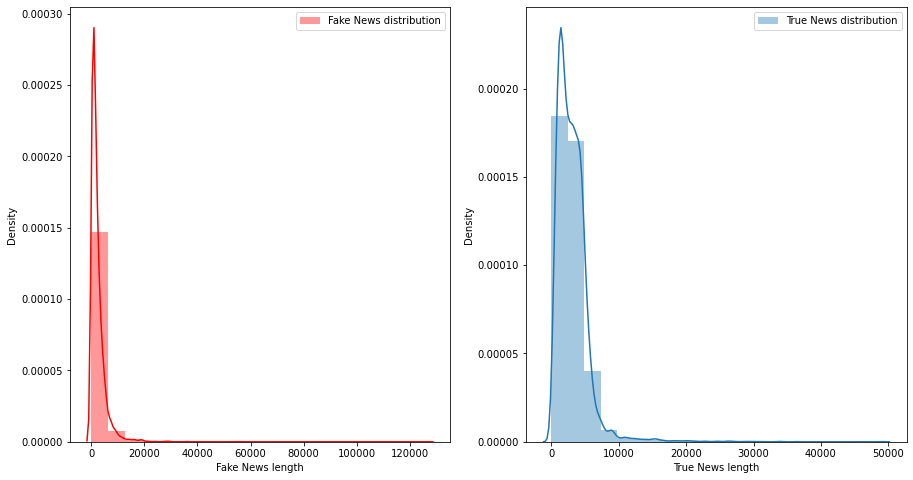

In [28]:
# news distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length_news'],bins=20,ax=ax[0],label='Fake News distribution',color='r')

ax[0].set_xlabel('Fake News length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length_news'],bins=20,ax=ax[1],label='True News distribution')
ax[1].set_xlabel('True News length')
ax[1].legend()

plt.show()

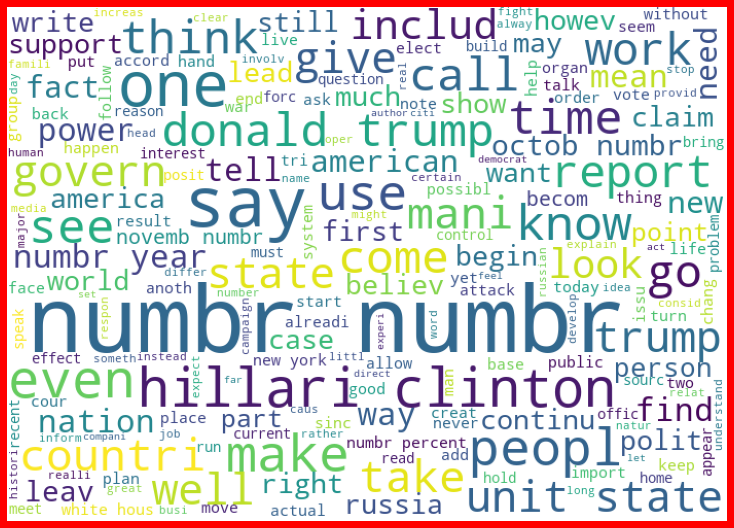

In [29]:
#Getting sense of loud words in Fake News - Articles
from wordcloud import WordCloud

fake = df['news'][df['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

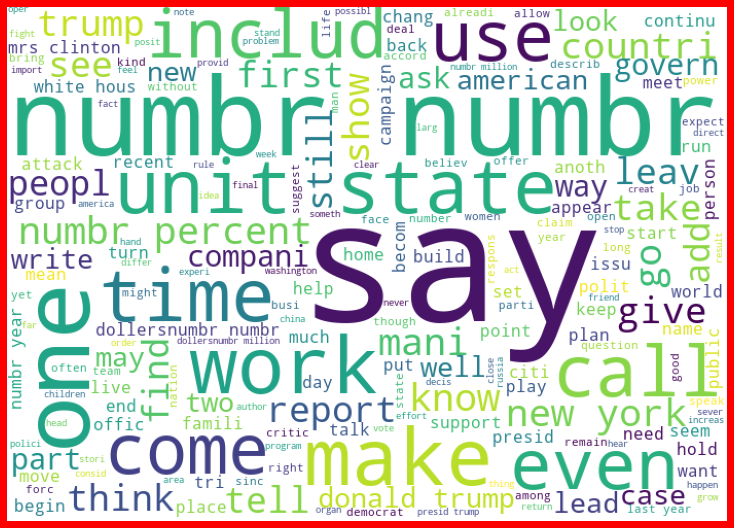

In [30]:
#Getting sense of loud words in Not Fake News - Articles
from wordcloud import WordCloud

not_fake = df['news'][df['label']==0]

not_fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(not_fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

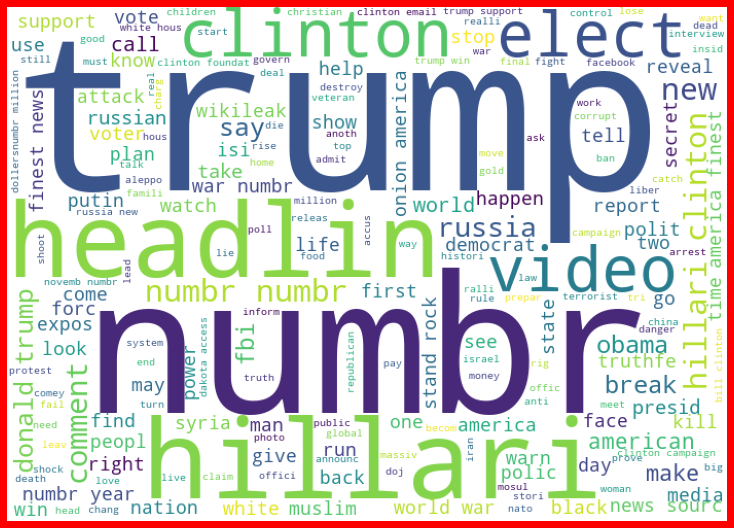

In [31]:
#Getting sense of loud words in Fake News - Headline
from wordcloud import WordCloud

fake = df['headline'][df['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

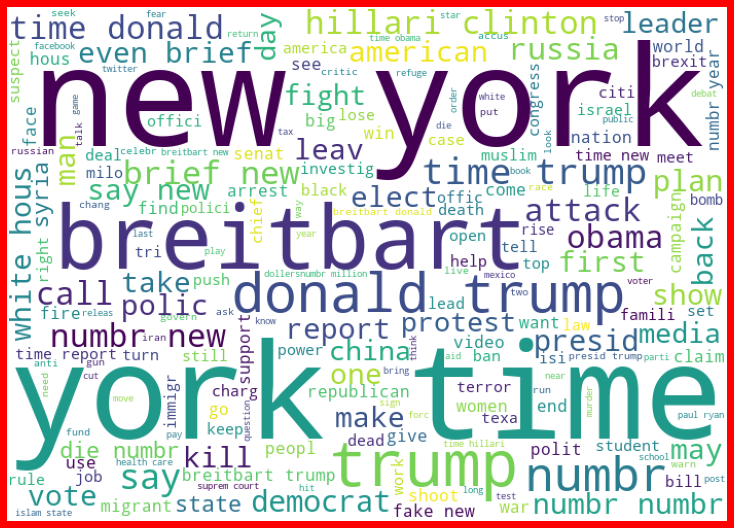

In [32]:
#Getting sense of loud words in Not Fake News - Headline
from wordcloud import WordCloud

not_fake = df['headline'][df['label']==0]

not_fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(not_fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
# 1. Convert text into vectors using TF-IDF
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['written_by'] + df['headline'] + df['news'])

X = features
y = df['label']
X.shape

(20761, 167960)

In [34]:
y.shape

(20761,)

# Model Building

In [35]:
# Libraries for training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Mmetrics to evaluate our model performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances

RF=RandomForestClassifier()
LR=LogisticRegression()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
AD=AdaBoostClassifier()
XG=XGBClassifier()

In [36]:
# List of Models
models=[]
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))

In [37]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** LogisticRegression *****************************


LogisticRegression()


Max Accuracy Score corresponding to Random State  43 is: 0.9489484668486113


Learning Score :  0.9678640242224057
Accuracy Score :  0.9489484668486113
Cross Val Score :  0.9876576959577197
roc auc score :  0.9489478364570788


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3116
           1       0.95      0.95      0.95      3113

    accuracy                           0.95      6229
   macro avg       0.95      0.95      0.95      6229
weighted avg       0.95      0.95      0.95      6229



Confusion Matrix:
 [[2961  155]
 [ 163 2950]]





*************************** MultinomialNB() *****************************


MultinomialNB()


Max Accuracy Score corresponding to Random State  52 is: 0.8383368116872693


Learning Score :  0.8773740710156895
Accuracy Score :  0.8383368116872693
Cross Val Score :  0

[22:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:38:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross Val Score :  0.9953654726674657
roc auc score :  0.9712625880041

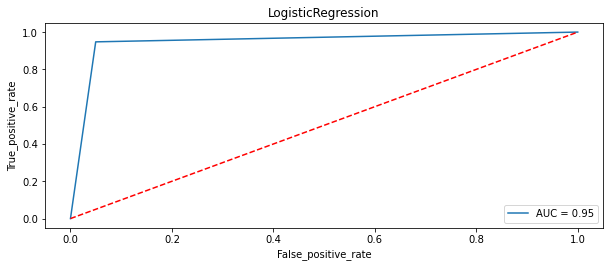

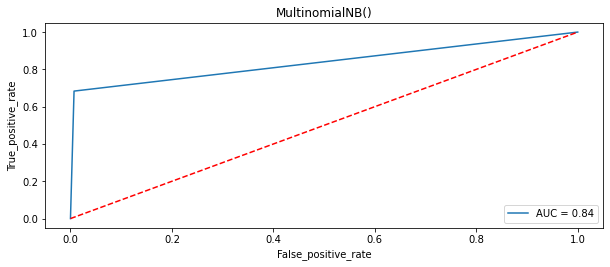

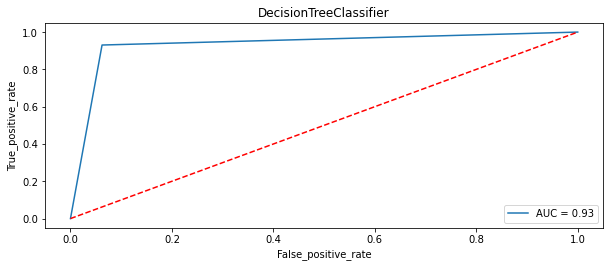

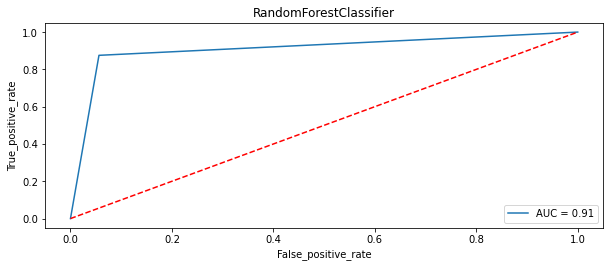

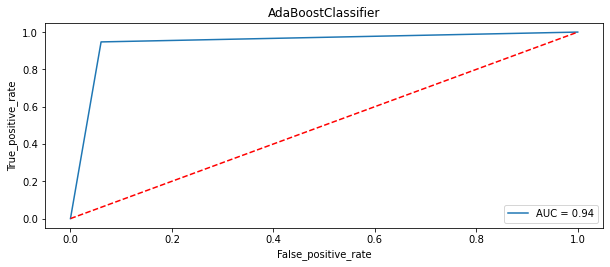

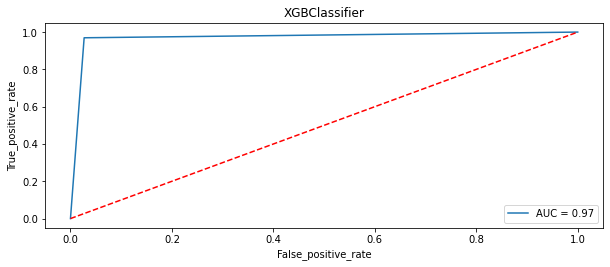

In [39]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,X,y)
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,X,y,cv=10,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    

    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [40]:
scores=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
scores.style.background_gradient()

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,LogisticRegression,96.786402,94.894847,98.765770,94.894784
1,MultinomialNB(),87.737407,83.833681,97.444174,83.826232
2,DecisionTreeClassifier,100.000000,93.417884,93.218256,93.417712
3,RandomForestClassifier,100.000000,90.961631,97.631336,90.959982
4,AdaBoostClassifier,94.068263,94.349013,98.317529,94.349197
5,XGBClassifier,99.944949,97.126345,99.536547,97.126259


<AxesSubplot:>

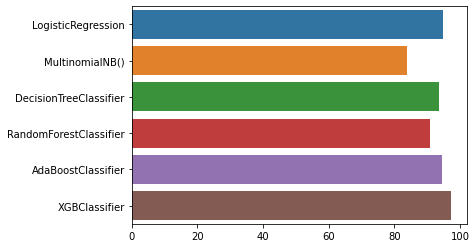

In [41]:
sns.barplot(y=Model,x=Acc_score)

# XG Boost seems to be the best performing model. But Let's try to tune the hyperparameters of Logistic Regression to see if we get a better model score

In [43]:
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(X,y)
    print(clf.best_params_)

In [44]:
# Using Grid Search CV
lr=LogisticRegression()
parameters={'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_cv(lr,parameters,'accuracy')

{'C': 25, 'penalty': 'l2'}


In [45]:
clf_lr = LogisticRegression(C=25,penalty='l2')
max_acc_score(clf_lr,X,y)

Max Accuracy Score corresponding to Random State  58 is: 0.9616310804302456




58

In [46]:
# Accuracy Score after tuning Logistic Regression is 0.96 and XG Boost is 0.97. I'm selecting XGBoost as the final model

# Final Model

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=98,test_size=.30,stratify=y)
XG=XGBClassifier()
XG.fit(x_train,y_train)
XG.score(x_train,y_train)
XGpred=XG.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,XGpred)) 
print('Confusion Matrix:\n',confusion_matrix(y_test,XGpred))
print('Classification Report:','\n',classification_report(y_test,XGpred))

[00:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.9712634451757907
Confusion Matrix:
 [[3032   84]
 [  95 3018]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3116
           1       0.97      0.97      0.97      3113

    accuracy                           0.97      6229
   macro avg       0.97      0.97      0.97      6229
weighted avg       0.97      0.97      0.97      6229



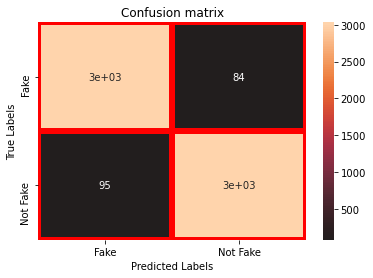

In [49]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,XGpred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Fake','Not Fake'])
ax.yaxis.set_ticklabels(['Fake','Not Fake'])
plt.show()

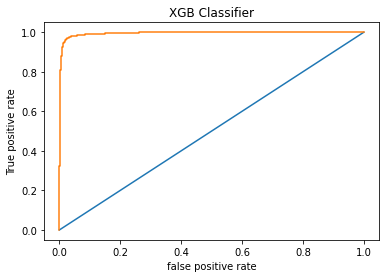

roc_auc_score =  0.9952208779531115


In [51]:
y_prob = XG.predict_proba(x_test)
y_prob = y_prob[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='XGB Classifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('XGB Classifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_prob))

In [52]:
test=pd.DataFrame(data=y_test,)
test['Predicted values']=XGpred

test.to_csv('Fake_news_Predict.csv')

test

,label,Predicted values
7342,1,1
2997,0,0
7882,1,1
13115,1,1
6538,1,1
...,...,...
7832,1,1
250,1,1
15308,0,0
15397,0,0


In [53]:
# Creating Pickle File
import joblib
joblib.dump(XG,'Fake_news_Predict.pkl')

['Fake_news_Predict.pkl']